In [ ]:
!pip install --upgrade matplotlib
!pip install yfinance

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
input_data = yf.download('MSFT','2020-01-01','2020-12-10').reset_index()
input_data.head()

In [ ]:
#Média Movel Simples
window = 40
input_data[f'SMA{window}'] = input_data['Adj Close'].rolling(window).mean()
input_data.tail()

In [ ]:
#Média Movel Exponencial
window = 40
input_data[f'EMA{window}'] = input_data['Adj Close'].ewm(span=window).mean()
input_data.tail()

In [ ]:
### Rpresentação Gráfica
style.use('fast')

#set parametros
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size':12})

In [ ]:
fig, ax = plt.subplots()

#Plot
ax.plot(input_data['Date'],input_data['Adj Close'],label='MSFT')
ax.plot(input_data['Date'],input_data['SMA10'],label='SMA10')
ax.plot(input_data['Date'],input_data['EMA10'],label='EMA10')

#formatar
ax.yaxis.set_major_formatter('${x:}')
ax.set_title('Média Móvel Simples e Exponencial')
ax.legend(loc='lower right')
fig.autofmt_xdate()

In [ ]:
import pandas as pd
import numpy as np
df = input_data.copy()
df = df.drop(columns=['SMA','SMA10','SMA40','EMA10','EMA40'])

In [ ]:
#1º) Calcular Variação
df['change'] = df['Close'] - df['Close'].shift(1)
#2º) Identificar/Seprara entre periodos de ganho e perda
df['gain'] = df.loc[df['change']>0,'change'].apply(abs)
df.loc[(df['gain'].isna()),'gain'] = 0
df.loc[0,'gain'] = np.NaN

df['loss'] = df.loc[df['change']<0,'change'].apply(abs)
df.loc[(df['loss'].isna()),'loss'] = 0
df.loc[0,'loss'] = np.NaN
#3º) Calcular Media Movel (Ganhos e Perdas)
window = 6
df['avg_gain'] = df['gain'].rolling(window).mean()
df['avg_loss'] = df['loss'].rolling(window).mean()

first = df['avg_gain'].first_valid_index()
#print(first)
for index,row in df.iterrows():
  if index == first:
    prev_avg_gain = row['avg_gain']
    prev_avg_loss = row['avg_loss']
  elif index > first:
    df.loc[index,'avg_gain'] = ((prev_avg_gain*(window-1)) + row['gain'])/window
    prev_avg_gain = df.loc[index,'avg_gain']

    df.loc[index,'avg_loss'] = ((prev_avg_loss*(window-1)) + row['loss'])/window
    prev_avg_loss = df.loc[index,'avg_loss']
#4º) Calcular RS
df[f'RS{window}'] = df['avg_gain']/df['avg_loss']
#5º) Calcular RSI
df[f'RSI{window}'] = 100 - (100/(1 + df[f'RS{window}']))
#df.tail()
df[['RS14','RSI14']].tail()

,RS14,RSI14
216,1.253016,55.615051
217,0.932195,48.245398
218,1.139183,53.253179
219,1.090479,52.164085
220,1.134862,53.158556


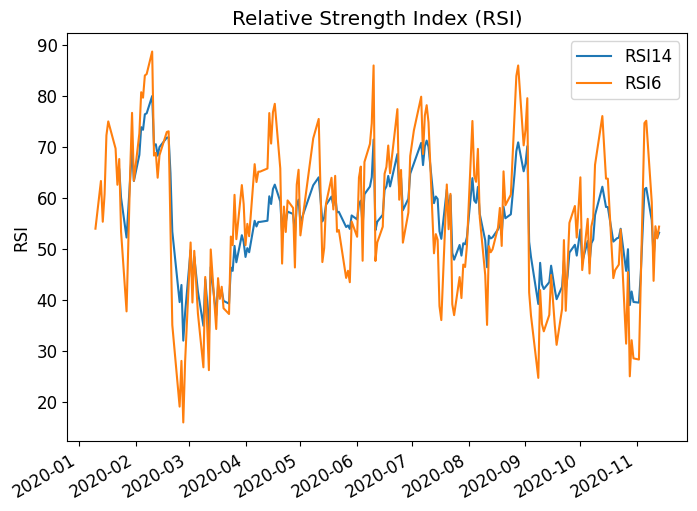

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Date'],df['RSI14'],label = 'RSI14')
ax.plot(df['Date'],df['RSI6'],label = 'RSI6')

#formatar
ax.set_ylabel('RSI')
ax.set_title('Relative Strength Index (RSI)')
ax.legend()

fig.autofmt_xdate()
